# Clone the repository and switch to the IUPWARE_2025 branch

Step 1

In [1]:
!git clone --branch IUPWARE_2025 https://github.com/paulmunozpauta/Course_ML_hydrological_forecasting.git

Cloning into 'Course_ML_hydrological_forecasting'...
remote: Enumerating objects: 748, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 748 (delta 80), reused 117 (delta 45), pack-reused 589 (from 1)
Receiving objects: 100% (748/748), 1.08 GiB | 20.03 MiB/s, done.
Resolving deltas: 100% (140/140), done.
Updating files: 100% (441/441), done.


Step 2

In [4]:
ls

LICENSE  notebooks/  poetry.lock  pyproject.toml  README.md


In [4]:
%cd Course_ML_hydrological_forecasting

/content/Course_ML_hydrological_forecasting


In [5]:
ls

LICENSE  notebooks/  poetry.lock  pyproject.toml  README.md


Step 3

In [6]:
# Install Poetry
!pip install poetry
# Disable virtual environment creation (needed for Colab)
!poetry config virtualenvs.create false

After restarting session repeat Steps 2-3


Step 4

In [7]:
!poetry install --no-root

Skipping virtualenv creation, as specified in config file.
Installing dependencies from lock file

Package operations: 29 installs, 58 updates, 0 removals

  - Downgrading attrs (25.1.0 -> 24.2.0): Pending...
  - Installing pyrsistent (0.19.3): Pending...
  - Updating traitlets (5.7.1 -> 5.9.0): Pending...
  - Installing pyrsistent (0.19.3): Pending...
  - Updating traitlets (5.7.1 -> 5.9.0): Pending...
  - Downgrading attrs (25.1.0 -> 24.2.0): Downloading... 0%
  - Installing pyrsistent (0.19.3): Pending...
  - Updating traitlets (5.7.1 -> 5.9.0): Pending...
  - Updating traitlets (5.7.1 -> 5.9.0): Downloading... 0%
  - Installing pyrsistent (0.19.3): Pending...
  - Updating traitlets (5.7.1 -> 5.9.0): Downloading... 0%
  - Downgrading attrs (25.1.0 -> 24.2.0): Downloading... 100%
  - Installing pyrsistent (0.19.3): Pending...
  - Updating traitlets (5.7.1 -> 5.9.0): Downloading... 0%
  - Updating traitlets (5.7.1 -> 5.9.0): Downloading... 0%
  - Installing pyrsistent (0.19.3): Downlo

Now let's start wit the hands-on course

<div style="text-align:center;">
    <img style="width: 30%;" src="https://github.com/paulmunozpauta/Course_ML_hydrological_forecasting/blob/IUPWARE_2025/notebooks/static/imgs/Logo_course.png?raw=1">
    <p style="margin-top:10px;">paul.andres.munoz@gmail.com<br>paul.munoz@vub.be</p>
</div>

# Part 2: Data acquisition and pre-processing of satellite precipitation data

In this session, we will:

- Access PERSIANN and IMERG data repositories
- Download satellite precipitation images
- Open and georeference satellite precipitation images
- Data manipulation and information generation
- Visualization

# Software for accessing free satellite data repositories

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta/Course_ML_hydrological_forecasting/blob/IUPWARE_2025/notebooks/static/imgs/FileZilla_download.png?raw=1"></div>

## Start FileZilla

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta/Course_ML_hydrological_forecasting/blob/IUPWARE_2025/notebooks/static/imgs/FileZilla.png?raw=1"></div>

# PERSIANN Data Source

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta/Course_ML_hydrological_forecasting/blob/IUPWARE_2025/notebooks/static/imgs/PERSIANN_head.png?raw=1"></div>

Website: http://chrs.web.uci.edu

Available Subproducts:
- PERSIANN
- PERSIANN-CCS
- PERSIANN-CDR
- PERSIANN-IDR

We will focus on the subproduct with the finest spatial/temporal resolution, **PERSIANN-CCS**.

**PERSIANN-CCS** uses satellite images to analyze clouds and predict precipitation worldwide. It was developed at the University of California, Irvine.

The precipitation estimation principle is highly detailed, analyzing the height of clouds and their coverage area. Unlike other methods, PERSIANN-CCS can identify individual clouds and provide specific information about them. This helps determine how much precipitation is falling in different regions. All this information is available in real time and can be easily downloaded.

In summary:

- **Data Period**: 2003 - present.
- **Coverage**: From 60°S to 60°N.
- **Resolution**: 0.04° x 0.04°, approximately 4.4 x 4.4 km per pixel.
- **Available Data**: Every 1 hour, 3 hours, 6 hours, daily, monthly, annually.
- **Latency**: Almost real-time (~2 hours).

## Connect to the PERSIANN Data Repository

Enter the following information:

- **Protocol**: FTP - File Transfer Protocol  
- **Host**: persiann.eng.uci.edu  
- **Logon Type**: Anonymous  

<div style="text-align:center;"><img style="width: 60%;" src="https://github.com/paulmunozpauta/Course_ML_hydrological_forecasting/blob/IUPWARE_2025/notebooks/static/imgs/FTP_PERSIANN.png?raw=1"></div>

Upon connecting, you will have remote access to the PERSIANN data folder.

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta/Course_ML_hydrological_forecasting/blob/IUPWARE_2025/notebooks/static/imgs/Filezilla_PERSIANN_CCS.png?raw=1"></div>

## Download Data from the PERSIANN-CCS Repository

Click derecho en la carpeta/archivo que queremos descargar en la carpeta local

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta/Course_ML_hydrological_forecasting/blob/IUPWARE_2025/notebooks/static/imgs/Filezilla_local.png?raw=1"></div>

We now have PERSIANN-CCS precipitation files.

## Visualize Data on the Platform

Access the data visualization platform using the following link:

[https://chrsdata.eng.uci.edu](https://chrsdata.eng.uci.edu)

## Open a Precipitation File

Import the necessary libraries:

In [8]:
import gzip
import descartes
import pickle
import numpy as np
from shapely.geometry import mapping
import geopandas as gpd
import os
import glob
import rasterio
import rioxarray
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime
import calendar
#import cartopy.crs as ccrs
import pandas as pd
from scipy import signal
import pickle
import h5py
#globe_proj = ccrs.PlateCarree()
def JulianDate_to_MMDDYYY(y,jd):
    month = 1
    day = 0
    while jd - calendar.monthrange(y,month)[1] > 0 and month <= 12:
        jd = jd - calendar.monthrange(y,month)[1]
        month = month + 1
    return jd, month

def getLine(data, line_no):
    n = 0
    lastPos = -1
    for i in range(0, len(data) - 1):
        if data[i] == "\n":
            n = n + 1
            if n == line_no:
                return data[lastPos + 1:i]
            else:
                lastPos = i;

    if(n == line_no - 1):
        return data[lastPos + 1:]
    return ""

Define project folder

In [16]:
folder = os.getcwd()
folder

'/content/Course_ML_hydrological_forecasting'

In [17]:
folder_files= folder+'/notebooks/data/PERSIANN-CCS/Hourly/Global/2023/'
folder_files

'/content/Course_ML_hydrological_forecasting/notebooks/data/PERSIANN-CCS/Hourly/Global/2023/'

Define the name of a file for reading

In [18]:
item=folder_files+'rgccs1h2301500.bin.gz'
item

'/content/Course_ML_hydrological_forecasting/notebooks/data/PERSIANN-CCS/Hourly/Global/2023/rgccs1h2301500.bin.gz'

Reading the file

In [19]:
f = gzip.GzipFile(item)
file_content = f.read()
data = np.frombuffer(file_content, dtype=np.dtype('>h')).astype(float)
data = data.reshape((3000,9000))
data_1 = data[:,4500:]
data_2 = data[:,:4500]
data = np.hstack((data_1,data_2))
data= data/100
data[data < 0] = np.nan
data = np.flipud(data)

In [ ]:
data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

Georeferencing the data matrix

In [20]:
lon=np.arange(-180,180,0.04)
lat=np.arange(60,-60,-0.04)
data = xr.DataArray(data=data, dims=["lat", "lon"], coords=[lat,lon])
data.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data

<xarray.DataArray (lat: 3000, lon: 9000)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 60.0 59.96 59.92 59.88 ... -59.88 -59.92 -59.96
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0

Plot the georeferenced global precipitation file

<ipython-input-24-3df042918b8c>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


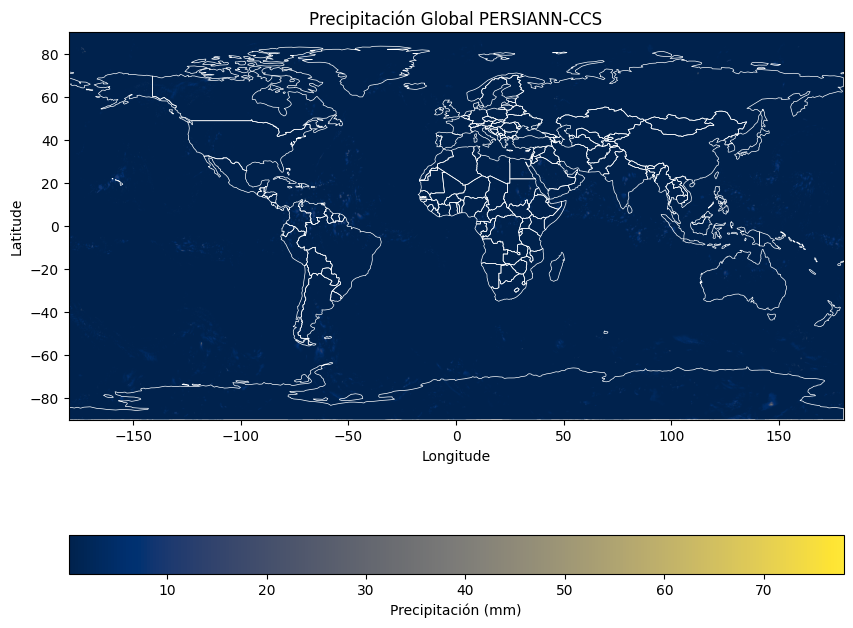

In [24]:
# Load the world map correctly
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot world boundaries
world.boundary.plot(ax=ax, color='white', linewidth=0.5)

# Plot the data
max_val = data.max()
im = ax.imshow(data, cmap='cividis', vmin=0.1, vmax=int(max_val), extent=[-180, 180, -90, 90])

# Set aspect ratio
ax.set_aspect('equal')

# Add title and labels
plt.title("Precipitación Global PERSIANN-CCS")
cbar = plt.colorbar(im, ax=ax, orientation='horizontal')
cbar.set_label('Precipitación (mm)')

plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


Extract basic statistics from the data:

In [25]:
print('Maximum precipitation = ',data.max().values,'mm')
print('Average precipitation = ',data.mean().values,'mm')
print('Minimum precipitation = ',data.min().values,'mm')

Maximum precipitation =  78.73 mm
Average precipitation =  0.11433396293872454 mm
Minimum precipitation =  0.0 mm


Load the shapefile of a hydrological system:
- For example, a mountain catchment in Ecuador, South America

In [29]:
data.rio.write_crs("epsg:4326", inplace=True)
catchment_shp_1 = gpd.read_file(folder+'/notebooks/shapefiles/Catchment_SA.shp')

Display the catchment

<Axes: >

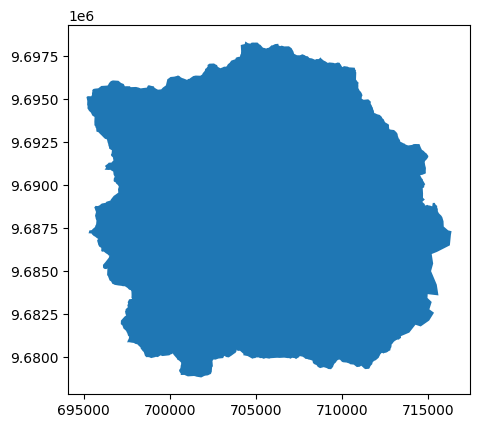

In [ ]:
catchment_shp_1.plot()

Clip the global precipitation data to the catchment

In [30]:
data_catchment_1 = data.rio.clip(catchment_shp_1.geometry.apply(mapping),catchment_shp_1.crs,all_touched=True)

Mostrar la precipitación de la cuenca del río Tomebamba

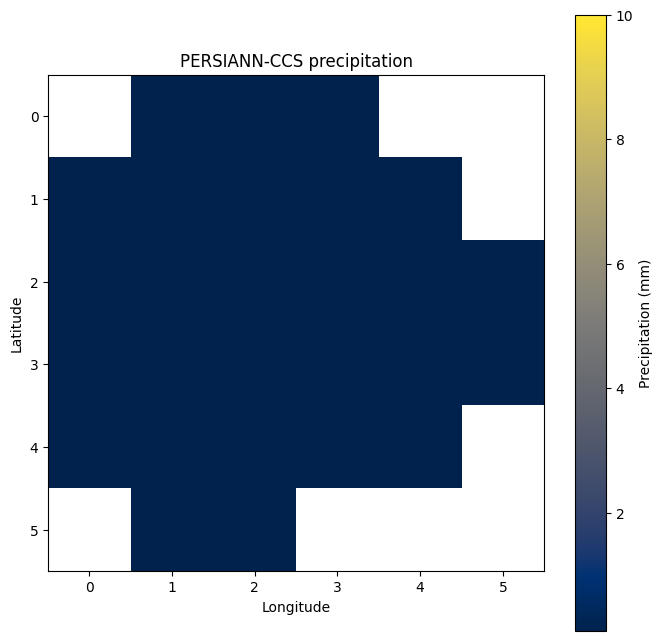

In [31]:
fig = plt.subplots(figsize=(8,8))
plt.imshow(data_catchment_1,cmap='cividis',vmin=0.1,vmax=10)
plt.title("PERSIANN-CCS precipitation")
plt.colorbar(label='Precipitation (mm)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Basic precipitation statistics for the catchment

In [32]:
print('Maximum precipitation = ',data_catchment_1.max().values,'mm')
print('Average precipitation= ',data_catchment_1.mean().values,'mm')
print('Minimum precipitation = ',data_catchment_1.min().values,'mm')

Maximum precipitation =  0.0 mm
Average precipitation=  0.0 mm
Minimum precipitation =  0.0 mm


Now, for another catchment
- Coastal catchment in Ecuador

<Axes: >

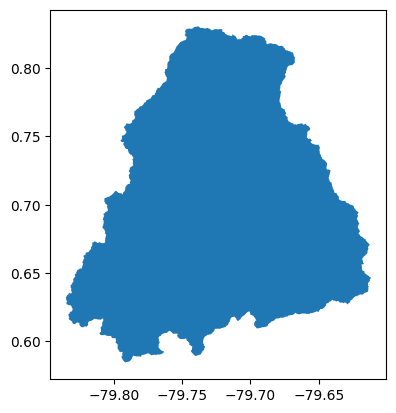

In [34]:
catchment_shp_2 = gpd.read_file(folder+'/notebooks/shapefiles/Coastal_catchment.geojson')
catchment_shp_2.plot()

Clip the global precipitation data to the coastal catchment

In [35]:
data_catchment_2 = data.rio.clip(catchment_shp_2.geometry.apply(mapping),catchment_shp_2.crs,all_touched=True)

Mostrar la precipitación en la cuenca

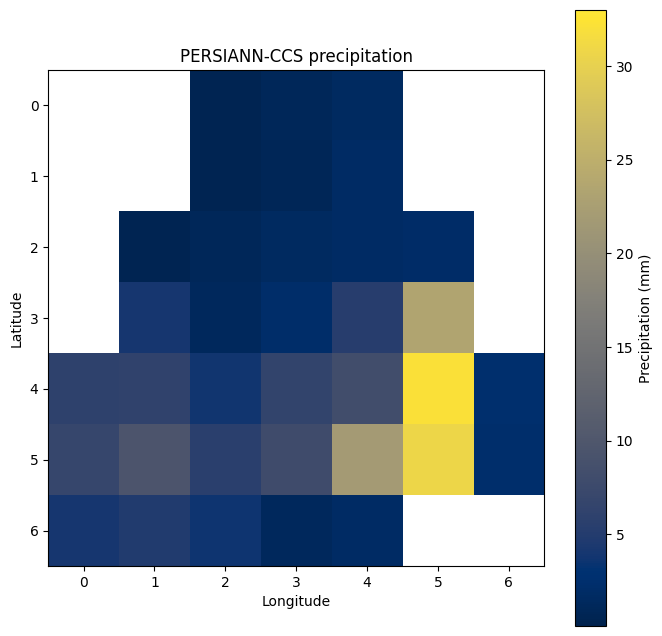

In [36]:
fig = plt.subplots(figsize=(8,8))
plt.imshow(data_catchment_2,cmap='cividis',vmin=0.1,vmax=33)
plt.title("PERSIANN-CCS precipitation")
plt.colorbar(label='Precipitation (mm)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Basic precipitation statistics for the coastal catchment

In [37]:
print('Maximum precipitation = ',data_catchment_2.max().values,'mm')
print('Average precipitation= ',data_catchment_2.mean().values,'mm')
print('Minimum precipitation = ',data_catchment_2.min().values,'mm')

Maximum precipitation =  32.19 mm
Average precipitation=  6.167428571428572 mm
Minimum precipitation =  0.53 mm


**Now read all the downloaded precipitation files**

Create a list for the downloaded files

In [38]:
folder_files
file_extension = "*.bin.gz"
list_of_Files = glob.glob(os.path.join(folder_files, file_extension))
list_of_Files = [file_name for file_name in list_of_Files if not file_name.startswith('.DS_Store')]
list_of_Files.sort()

Display the list

In [39]:
list_of_Files[:10]

['/content/Course_ML_hydrological_forecasting/notebooks/data/PERSIANN-CCS/Hourly/Global/2023/rgccs1h2300100.bin.gz',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/PERSIANN-CCS/Hourly/Global/2023/rgccs1h2300101.bin.gz',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/PERSIANN-CCS/Hourly/Global/2023/rgccs1h2300102.bin.gz',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/PERSIANN-CCS/Hourly/Global/2023/rgccs1h2300103.bin.gz',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/PERSIANN-CCS/Hourly/Global/2023/rgccs1h2300104.bin.gz',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/PERSIANN-CCS/Hourly/Global/2023/rgccs1h2300105.bin.gz',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/PERSIANN-CCS/Hourly/Global/2023/rgccs1h2300106.bin.gz',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/PERSIANN-CCS/Hourly/Global/2023/rgccs1h2300107.bin.gz',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/PER

Read the files, one by one, and calculate the accumulated precipitation for the first 15 days of January 2023

In [40]:
data_sum = xr.DataArray(data=np.empty((3000, 9000)), dims=["lat", "lon"])
for index, item in enumerate(list_of_Files):
    print(index+1, 'out of', len(list_of_Files))
    f=gzip.GzipFile(item)
    try:
        file_content = f.read()
    except (IOError, EOFError) as e:
        continue
    data = np.frombuffer(file_content, dtype=np.dtype('>h')).astype(float)
    data = data.reshape((3000,9000))
    data_1 = data[:,4500:]
    data_2 = data[:,:4500]
    data = np.hstack((data_1,data_2))
    data= data/100
    data[data < 0] = np.nan
    data = np.flipud(data)
    data = xr.DataArray(data=data, dims=["lat", "lon"], coords=[lat,lon])
    data_sum+=data

1 out of 337
2 out of 337
3 out of 337
4 out of 337
5 out of 337
6 out of 337
7 out of 337
8 out of 337
9 out of 337
10 out of 337
11 out of 337
12 out of 337
13 out of 337
14 out of 337
15 out of 337
16 out of 337
17 out of 337
18 out of 337
19 out of 337
20 out of 337
21 out of 337
22 out of 337
23 out of 337
24 out of 337
25 out of 337
26 out of 337
27 out of 337
28 out of 337
29 out of 337
30 out of 337
31 out of 337
32 out of 337
33 out of 337
34 out of 337
35 out of 337
36 out of 337
37 out of 337
38 out of 337
39 out of 337
40 out of 337
41 out of 337
42 out of 337
43 out of 337
44 out of 337
45 out of 337
46 out of 337
47 out of 337
48 out of 337
49 out of 337
50 out of 337
51 out of 337
52 out of 337
53 out of 337
54 out of 337
55 out of 337
56 out of 337
57 out of 337
58 out of 337
59 out of 337
60 out of 337
61 out of 337
62 out of 337
63 out of 337
64 out of 337
65 out of 337
66 out of 337
67 out of 337
68 out of 337
69 out of 337
70 out of 337
71 out of 337
72 out of 337
7

In [41]:
data_sum

<xarray.DataArray (lat: 3000, lon: 9000)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 60.0 59.96 59.92 59.88 ... -59.88 -59.92 -59.96
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0

- Georeference the data
- Clip the accumulated satellite precipitation to the catchment shapefile

In [42]:
data_sum.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data_sum.rio.write_crs("epsg:4326", inplace=True)
data_catchment_1 = data_sum.rio.clip(catchment_shp_1.geometry.apply(mapping),catchment_shp_1.crs,all_touched=True)

- Plot the data.
- Display basic statistics.

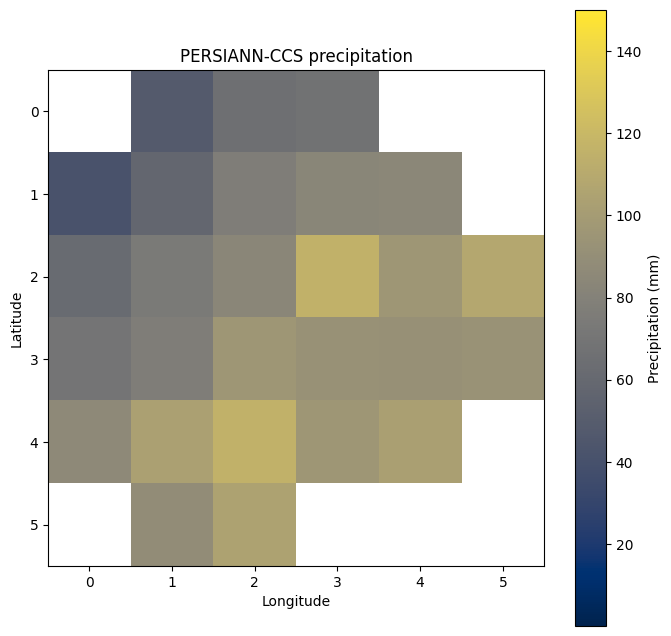

Maximum precipitación =  115.69000000000004 mm
Average precipitación =  84.5777777777778 mm
Minimum precipitación =  41.260000000000005 mm


In [43]:
fig = plt.subplots(figsize=(8,8))
plt.imshow(data_catchment_1,cmap='cividis',vmin=0.1,vmax=150)
plt.title("PERSIANN-CCS precipitation")
plt.colorbar(label='Precipitation (mm)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
print('Maximum precipitación = ',data_catchment_1.max().values,'mm')
print('Average precipitación = ',data_catchment_1.mean().values,'mm')
print('Minimum precipitación = ',data_catchment_1.min().values,'mm')

Now for the coastal catchment

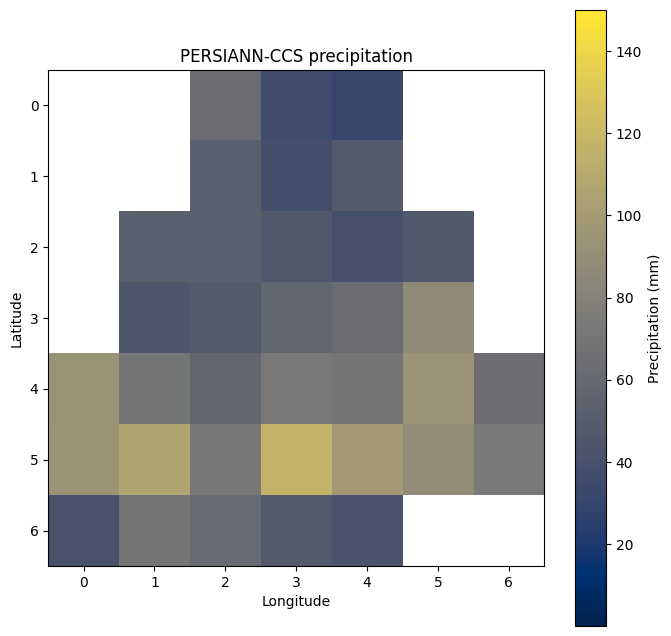

Maximum precipitación =  116.85000000000002 mm
Average precipitación =  64.34514285714286 mm
Minimum precipitación =  30.730000000000004 mm


In [44]:
data_catchment_2 = data_sum.rio.clip(catchment_shp_2.geometry.apply(mapping),catchment_shp_2.crs,all_touched=True)
fig = plt.subplots(figsize=(8,8))
plt.imshow(data_catchment_2,cmap='cividis',vmin=0.1,vmax=150)
plt.title("PERSIANN-CCS precipitation")
plt.colorbar(label='Precipitation (mm)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
print('Maximum precipitación = ',data_catchment_2.max().values,'mm')
print('Average precipitación = ',data_catchment_2.mean().values,'mm')
print('Minimum precipitación = ',data_catchment_2.min().values,'mm')

Generate a dataFrame with precipitation time series (for each pixel):

- Example: In the mountain catchment, time series for January 1, 2023.

In [45]:
dataset_list = []  # Store data frames for concatenation later

for index, item in enumerate(list_of_Files[:24]):
    print(index + 1, 'out of', len(list_of_Files[:24]))

    try:
        with gzip.GzipFile(item, 'rb') as f:
            file_content = f.read()
    except (IOError, EOFError):
        continue  # Skip to next file if there's an error

    data = np.frombuffer(file_content, dtype=np.dtype('>h')).astype(float)  # Convert to float
    data = data.reshape((3000, 9000))

    # Splitting and rearranging data
    data_1 = data[:, 4500:]
    data_2 = data[:, :4500]
    data = np.hstack((data_1, data_2))

    data = data / 100  # Scale values
    data[data < 0] = np.nan  # Replace negative values with NaN
    data = np.flipud(data)  # Flip vertically

    # Convert to xarray DataArray
    data = xr.DataArray(data=data, dims=["lat", "lon"], coords=[lat, lon])
    data.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
    data.rio.write_crs("epsg:4326", inplace=True)

    # Clip the data using the catchment shape
    data = data.rio.clip(catchment_shp_1.geometry.apply(mapping), catchment_shp_1.crs, all_touched=True)
    data = data.values.flatten()

    # Extract date from filename
    date_att = str(item)
    year = int('20' + str(date_att[-14:-12]))
    julian_day = int(str(date_att[-12:-9]))
    day, month = JulianDate_to_MMDDYYY(year, julian_day)
    hour = int(str(date_att[-9:-7]))

    date = datetime.datetime(year, month, day, hour, 0, 0)

    # Convert data to DataFrame
    data = pd.DataFrame(data)
    data = data.dropna()
    data = data.T
    data.index = pd.DatetimeIndex([date])  # Set datetime index

    dataset_list.append(data)  # Append to the list

# Concatenate all DataFrames
if dataset_list:
    dataset = pd.concat(dataset_list)


1 out of 24
2 out of 24
3 out of 24
4 out of 24
5 out of 24
6 out of 24
7 out of 24
8 out of 24
9 out of 24
10 out of 24
11 out of 24
12 out of 24
13 out of 24
14 out of 24
15 out of 24
16 out of 24
17 out of 24
18 out of 24
19 out of 24
20 out of 24
21 out of 24
22 out of 24
23 out of 24
24 out of 24


- Preprocess the information
- Remove duplicate data

In [46]:
dataset.shape

(24, 27)

In [47]:
dataset = dataset.sort_index()
dataset = dataset[~dataset.index.duplicated(keep='first')]
dataset

,1,2,3,6,7,8,9,10,12,13,...,21,22,23,24,25,26,27,28,31,32
2023-01-01 00:00:00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 01:00:00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 02:00:00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 03:00:00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 04:00:00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 05:00:00,0.0,0.0,0.26,0.0,0.0,0.0,2.57,0.0,0.0,0.0,...,0.09,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 06:00:00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 07:00:00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 08:00:00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 09:00:00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Export this information in **CSV** format

In [48]:
dataset.to_csv(folder_files+"PERSIANN-CCS_UTC_Catchment_1.csv", index=True)

Plot the extracted satellite precipitation

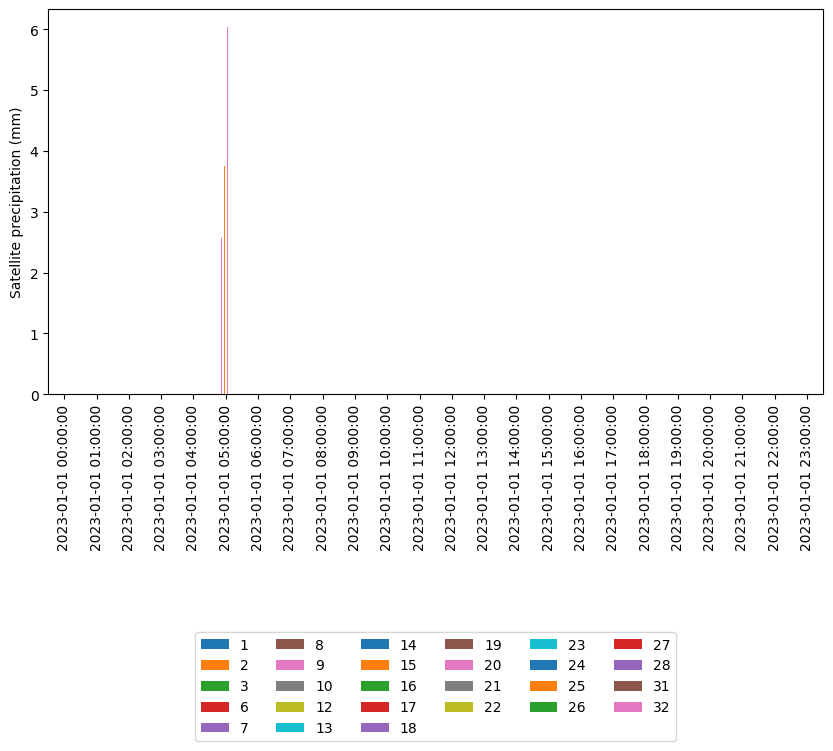

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.plot(kind='bar', ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Satellite precipitation (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=6)
plt.show()

Calculate and plot the accumulated precipitation

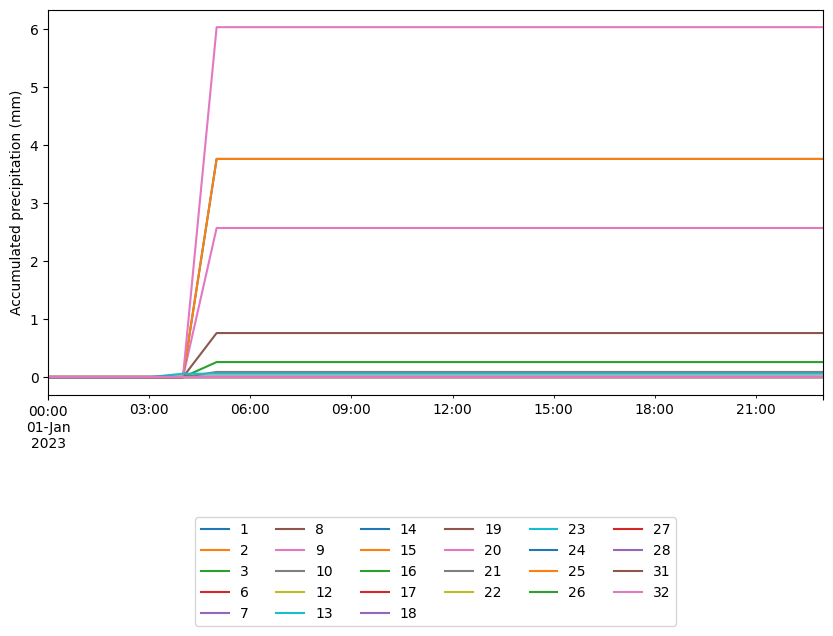

In [50]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.cumsum().plot(ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Accumulated precipitation (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=6)
plt.show()

# IMERG Data Sources

Website: [https://gpm.nasa.gov/data/imerg](https://gpm.nasa.gov/data/imerg)

## Available Subproducts:
- **Early Run**
- **Late Run**
- **Final Run**

We will focus on the subproduct with the finest spatial/temporal resolution, **IMERG-Early Run**.

## Prior registration to download IMERG data

To access and download IMERG data, prior registration is required. Follow these steps:

https://registration.pps.eosdis.nasa.gov/registration/newContact.html

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta/Course_ML_hydrological_forecasting/blob/IUPWARE_2025/notebooks/static/imgs/IMERG_registration.png?raw=1"></div>


Once registered, confirm your account via the email verification link.  

## Connect to the IMERG data repository

Enter the following information to connect to the IMERG FTP server:

- **Protocol:** FTP - File Transfer Protocol  
- **Host:** `jsimpsonftps.pps.eosdis.nasa.gov`  
- **Logon Type:** Normal  
  - Enter your **username** and **password** from your NASA Earthdata account.

Once connected, navigate to the desired directory to access IMERG data.

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta/Course_ML_hydrological_forecasting/blob/IUPWARE_2025/notebooks/static/imgs/IMERG_FTP.png?raw=1"></div>

Upon connecting, you gain remote access to the IMERG data folder.  

From here, you can navigate through the directories to locate and download the desired datasets.

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta/Course_ML_hydrological_forecasting/blob/IUPWARE_2025/notebooks/static/imgs/IMERG_server.png?raw=1"></div>

## Download data from the IMERG-Early Run repository


Right-click on the folder/file you want to download and select **"Download"** to save it to your local directory.  

## Open an IMERG precipitation file

Define IMERG-ER data folder

In [54]:
folder = os.getcwd()
folder_files= folder+'/notebooks/data/IMERG-ER/Hourly/Global/202301/'
folder_files

'/content/Course_ML_hydrological_forecasting/notebooks/data/IMERG-ER/Hourly/Global/202301/'

Create a list of precipitation files from January 31, 2023.

In [55]:
list_of_Files = glob.glob(folder_files + '/*H5')
list_of_Files.sort()

Display the list

In [56]:
list_of_Files

['/content/Course_ML_hydrological_forecasting/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S000000-E002959.0000.V06C.RT-H5',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S003000-E005959.0030.V06C.RT-H5',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S010000-E012959.0060.V06C.RT-H5',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S013000-E015959.0090.V06C.RT-H5',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S020000-E022959.0120.V06C.RT-H5',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S023000-E025959.0150.V06C.RT-H5',
 '/content/Course_ML_hydrological_forecasting/notebooks/da

Define the path of a file for reading.

In [57]:
item=folder_files+'3B-HHR-E.MS.MRG.3IMERG.20230131-S000000-E002959.0000.V06C.RT-H5'
item

'/content/Course_ML_hydrological_forecasting/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S000000-E002959.0000.V06C.RT-H5'

Open a precipitation file.

In [58]:
data = h5py.File( item, 'r' )
precip = data['/Grid/precipitationCal'][:]
precip = np.flip( precip[0,:,:].transpose(), axis=0 )

Display the read data matrix.

In [59]:
precip

array([[    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. , -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       ...,
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9]],
      dtype=float32)

Basic statistics

In [60]:
print('Maximum precipitation = ',precip.max(),'mm')
print('Average precipitation = ',precip.mean(),'mm')
print('Minimum precipitation = ',precip.min(),'mm')

Maximum precipitation =  77.89 mm
Average precipitation =  -2579.9229 mm
Minimum precipitation =  -9999.9 mm


Display the global precipitation information.

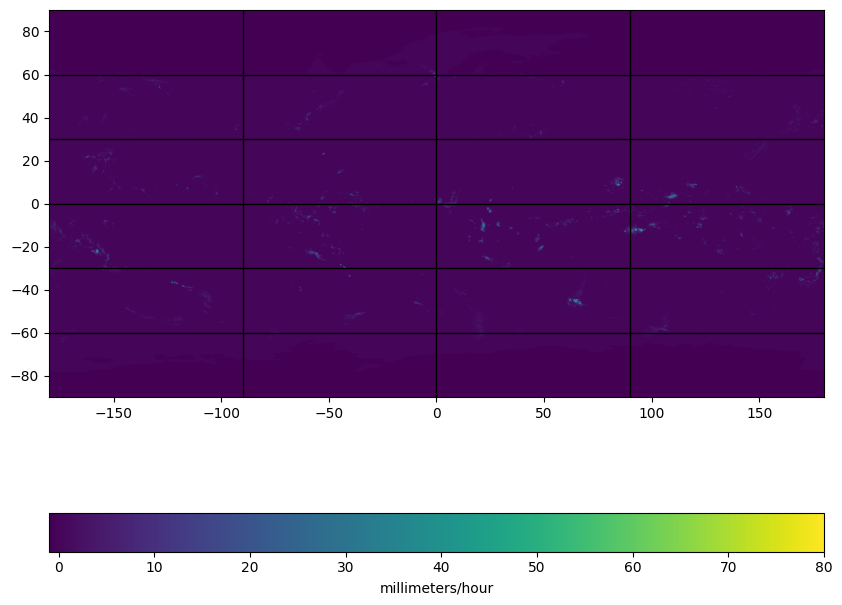

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(precip, vmin=-1, vmax=80, extent=[-180, 180, -90, 90])
cbar = plt.colorbar(im, orientation='horizontal')
cbar.set_label('millimeters/hour')
for lon in np.arange(-90, 90+1, 90):
    plt.plot((lon, lon), (-90, +90), color="black", linewidth=1)
for lat in np.arange(-60, 60+1, 30):
    plt.plot((-180, +180), (lat, lat), color="black", linewidth=1)
plt.show()

Georeference and clip the global precipitation data to the Tomebamba River basin.

In [62]:
precip

array([[    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. , -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       ...,
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9]],
      dtype=float32)

In [64]:
lat = data['/Grid/lat'][:]
lon = data['/Grid/lon'][:]
catchment_shp_1 = gpd.read_file(folder+'/notebooks/shapefiles/Catchment_SA.shp')
data = xr.DataArray(data=precip, dims=["lat", "lon"], coords=[lat,lon])
data.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data.rio.write_crs("epsg:4326", inplace=True)
data_catchment_1= data.rio.clip(catchment_shp_1.geometry.apply(mapping),catchment_shp_1.crs,all_touched=True)

Plot the precipitation for the mountain catchment

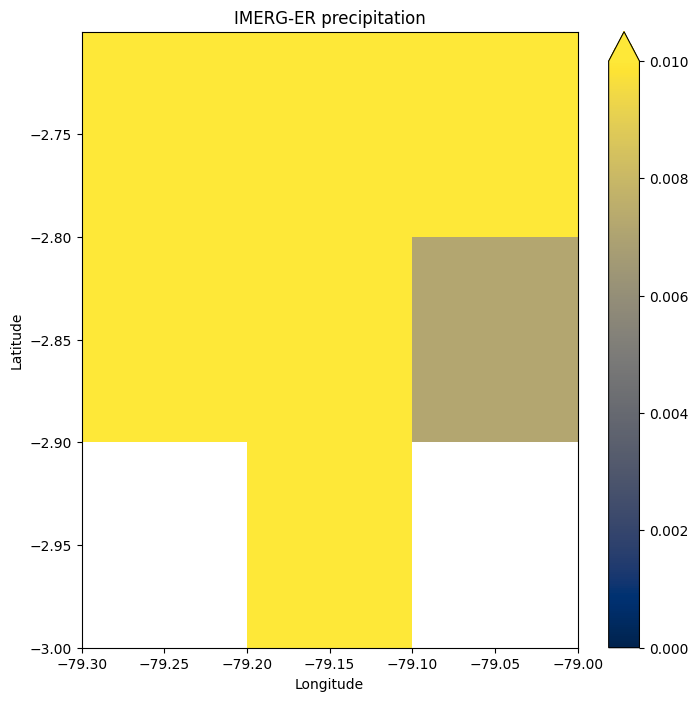

In [ ]:
fig = plt.subplots(figsize=(8,8))
data_catchment_1.plot(cmap='cividis',vmin=0,vmax=0.01)
plt.title("IMERG-ER precipitation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Basic statistics

In [65]:
print('Maximum precipitation = ',data_catchment_1.max().values,'mm')
print('Average precipitation = ',data_catchment_1.mean().values,'mm')
print('Minimum precipitation = ',data_catchment_1.min().values,'mm')

Maximum precipitation =  0.09930741786956787 mm
Average precipitation =  0.050089043 mm
Minimum precipitation =  0.007170210126787424 mm


Plot the precipitation for the coastal catchment

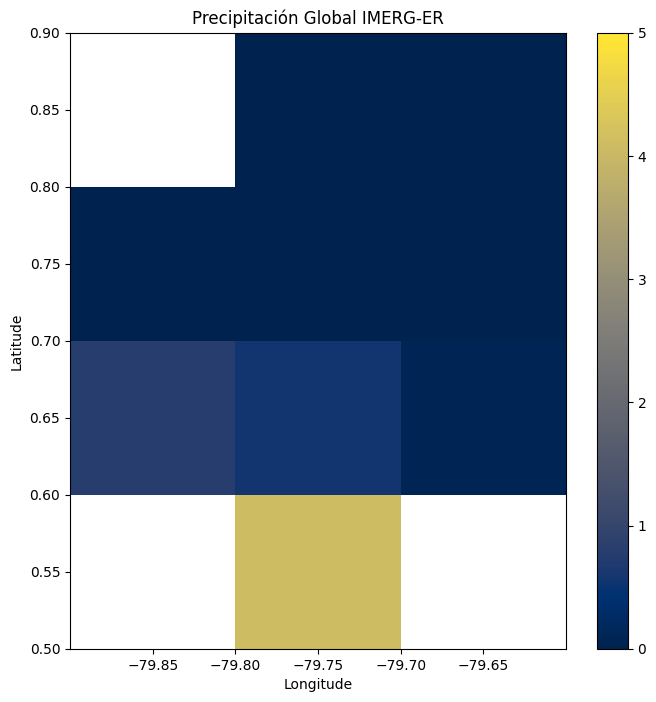

Maximum precipitation =  4.086399078369141 mm
Average precipitation =  0.6110221 mm
Minimum precipitation =  0.0 mm


In [68]:
catchment_shp_2 = gpd.read_file(folder+'/notebooks/shapefiles/Coastal_catchment.geojson')
data_catchment_2 = data.rio.clip(catchment_shp_2.geometry.apply(mapping),catchment_shp_2.crs,all_touched=True)
fig = plt.subplots(figsize=(8,8))
data_catchment_2.plot(cmap='cividis',vmin=0,vmax=5)
plt.title("Precipitación Global IMERG-ER")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
print('Maximum precipitation = ',data_catchment_2.max().values,'mm')
print('Average precipitation = ',data_catchment_2.mean().values,'mm')
print('Minimum precipitation = ',data_catchment_2.min().values,'mm')

Read and process all IMERG-ER files.

Display the list

In [69]:
list_of_Files

['/content/Course_ML_hydrological_forecasting/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S000000-E002959.0000.V06C.RT-H5',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S003000-E005959.0030.V06C.RT-H5',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S010000-E012959.0060.V06C.RT-H5',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S013000-E015959.0090.V06C.RT-H5',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S020000-E022959.0120.V06C.RT-H5',
 '/content/Course_ML_hydrological_forecasting/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S023000-E025959.0150.V06C.RT-H5',
 '/content/Course_ML_hydrological_forecasting/notebooks/da

Accumulate precipitation

In [72]:
data_sum = xr.DataArray(data=np.empty((1800, 3600)), dims=["lat", "lon"])
for index, item in enumerate(list_of_Files):
    print(index+1, 'out of', len(list_of_Files))
    try:
        data = h5py.File(item, 'r')
        precip = data['/Grid/precipitationCal'][:]
        precip[precip < 0] = np.nan
        precip = np.flip(precip[0,:,:].transpose(), axis=0)
        theLats = data['Grid/lat'][:]
        theLons = data['Grid/lon'][:]
        x, y = np.meshgrid(theLons, theLats)

        precip = xr.DataArray(precip, dims=('lat', 'lon'), coords={'lat' : theLats, 'lon' : theLons})

        data_sum += precip

        data.close()

    except (IOError, EOFError) as e:
        continue

1 out of 48
2 out of 48
3 out of 48
4 out of 48
5 out of 48
6 out of 48
7 out of 48
8 out of 48
9 out of 48
10 out of 48
11 out of 48
12 out of 48
13 out of 48
14 out of 48
15 out of 48
16 out of 48
17 out of 48
18 out of 48
19 out of 48
20 out of 48
21 out of 48
22 out of 48
23 out of 48
24 out of 48
25 out of 48
26 out of 48
27 out of 48
28 out of 48
29 out of 48
30 out of 48
31 out of 48
32 out of 48
33 out of 48
34 out of 48
35 out of 48
36 out of 48
37 out of 48
38 out of 48
39 out of 48
40 out of 48
41 out of 48
42 out of 48
43 out of 48
44 out of 48
45 out of 48
46 out of 48
47 out of 48
48 out of 48


Plot the accumulated precipitation information for January 31, 2023.

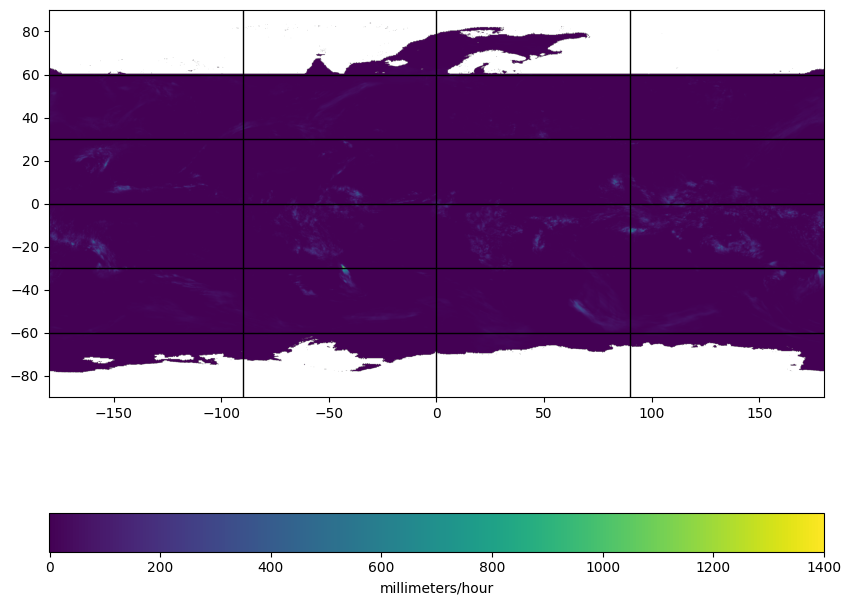

In [73]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(data_sum, vmin=-1, vmax=1400, extent=[-180, 180, -90, 90])
cbar = plt.colorbar(im, orientation='horizontal')
cbar.set_label('millimeters/hour')

for lon in np.arange(-90, 90+1, 90):
    plt.plot((lon, lon), (-90, +90), color="black", linewidth=1)
for lat in np.arange(-60, 60+1, 30):
    plt.plot((-180, +180), (lat, lat), color="black", linewidth=1)

plt.show()

Clip that information to the mountain catchment

In [74]:
data_sum.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data_sum.rio.write_crs("epsg:4326", inplace=True)
data_sum_catchment_1= data_sum.rio.clip(catchment_shp_1.geometry.apply(mapping),catchment_shp_1.crs,all_touched=True)
data_sum_catchment_1

<xarray.DataArray (lat: 3, lon: 3)>
array([[        nan, 15.43885659,         nan],
       [ 8.32326977,  9.09369504,  8.29173989],
       [ 5.1493402 ,  6.15480427,  4.62113877]])
Coordinates:
  * lat          (lat) float32 -2.95 -2.85 -2.75
  * lon          (lon) float32 -79.25 -79.15 -79.05
    spatial_ref  int64 0

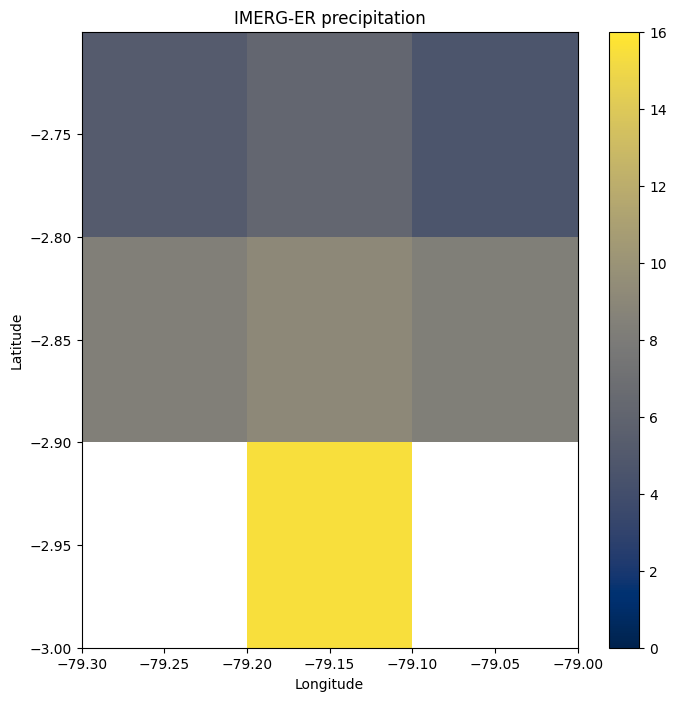

Maximum precipitación =  15.438856594264507 mm
Average precipitación =  8.153263505681284 mm
Minimum precipitation =  4.621138773858547 mm


In [75]:
fig = plt.subplots(figsize=(8,8))
data_sum_catchment_1.plot(cmap='cividis',vmin=0,vmax=16)
plt.title("IMERG-ER precipitation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
print('Maximum precipitación = ',data_sum_catchment_1.max().values,'mm')
print('Average precipitación = ',data_sum_catchment_1.mean().values,'mm')
print('Minimum precipitation = ',data_sum_catchment_1.min().values,'mm')

Now for the coastal catchment

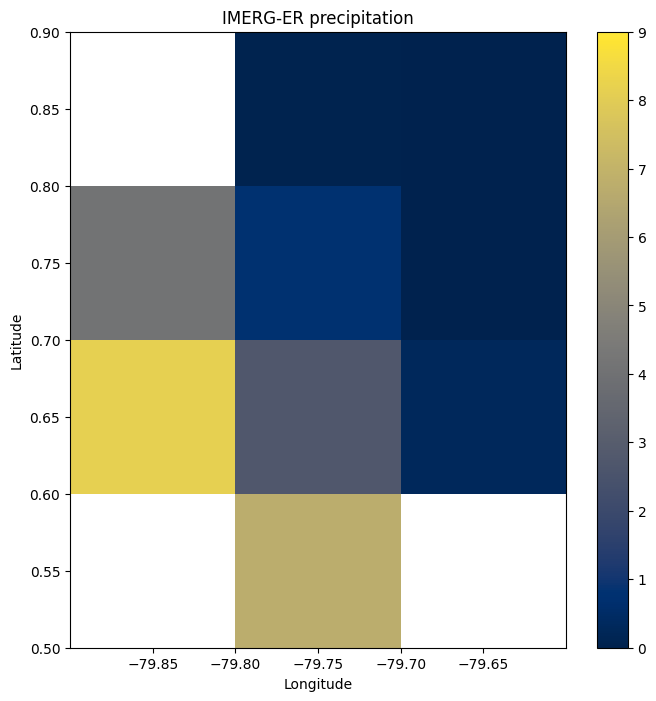

Maximum precipitation =  8.14799827337265 mm
Average precipitation =  2.533955109616121 mm
Minimum precipitation =  0.0 mm


In [76]:
data_sum = xr.DataArray(data_sum, dims=('lat', 'lon'), coords={'lat' : theLats, 'lon' : theLons})
data_sum.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data_sum.rio.write_crs("epsg:4326", inplace=True)
data_sum_catchment_2= data_sum.rio.clip(catchment_shp_2.geometry.apply(mapping),catchment_shp_2.crs,all_touched=True)
fig = plt.subplots(figsize=(8,8))
data_sum_catchment_2.plot(cmap='cividis',vmin=0,vmax=9)
plt.title("IMERG-ER precipitation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
print('Maximum precipitation = ',data_sum_catchment_2.max().values,'mm')
print('Average precipitation = ',data_sum_catchment_2.mean().values,'mm')
print('Minimum precipitation = ',data_sum_catchment_2.min().values,'mm')

Generate a database with precipitation time series (pixels) for the mountain catchment

In [77]:
dataset_list = []  # List to store DataFrames for concatenation later

for index, item in enumerate(list_of_Files):
    print(index + 1, 'out of', len(list_of_Files))

    try:
        with h5py.File(item, 'r') as data:
            precip = data['/Grid/precipitationCal'][:]
    except (IOError, EOFError):
        continue  # Skip file if there's an error

    precip[precip < 0] = np.nan  # Replace negative values with NaN
    precip = np.flip(precip[0, :, :].transpose(), axis=0)  # Flip and transpose

    # Convert to xarray DataArray
    precip = xr.DataArray(precip, dims=('lat', 'lon'), coords={'lat': theLats, 'lon': theLons})
    precip.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
    precip.rio.write_crs("epsg:4326", inplace=True)

    # Clip the data using the catchment shape
    precip = precip.rio.clip(catchment_shp_1.geometry.apply(mapping), catchment_shp_1.crs, all_touched=True)
    precip = precip.values.flatten()

    # Extract date from filename
    year = int(item[-40:-36])
    month = int(item[-36:-34])
    day = int(item[-34:-32])
    hour = int(item[-22:-20])
    minute = int(item[-20:-18])

    date = datetime.datetime(year, month, day, hour, minute, 0)

    # Convert data to DataFrame
    data = pd.DataFrame(precip)
    data = data.dropna()
    data = data.T
    data.index = pd.DatetimeIndex([date])  # Set datetime index

    dataset_list.append(data)  # Append DataFrame to list

# Concatenate all DataFrames at the end
if dataset_list:
    dataset = pd.concat(dataset_list)

# Resample dataset, treating NaNs as zeros
dataset = dataset.resample('h', label='right', closed='right').sum().fillna(0)


1 out of 48
2 out of 48
3 out of 48
4 out of 48
5 out of 48
6 out of 48
7 out of 48
8 out of 48
9 out of 48
10 out of 48
11 out of 48
12 out of 48
13 out of 48
14 out of 48
15 out of 48
16 out of 48
17 out of 48
18 out of 48
19 out of 48
20 out of 48
21 out of 48
22 out of 48
23 out of 48
24 out of 48
25 out of 48
26 out of 48
27 out of 48
28 out of 48
29 out of 48
30 out of 48
31 out of 48
32 out of 48
33 out of 48
34 out of 48
35 out of 48
36 out of 48
37 out of 48
38 out of 48
39 out of 48
40 out of 48
41 out of 48
42 out of 48
43 out of 48
44 out of 48
45 out of 48
46 out of 48
47 out of 48
48 out of 48


Mostrar el dataframe

In [78]:
dataset

,1,3,4,5,6,7,8
2023-01-31 01:00:00,0.148423,0.198615,0.126196,0.014340,0.096081,0.094647,0.022945
2023-01-31 02:00:00,0.074212,0.099307,0.063098,0.007170,0.048040,0.047323,0.011472
2023-01-31 03:00:00,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000
2023-01-31 04:00:00,0.000000,0.000000,0.000000,0.000000,0.016658,0.016658,0.000000
2023-01-31 05:00:00,0.000000,0.000000,0.000000,0.000000,0.009997,0.009997,0.000000
2023-01-31 06:00:00,0.000000,0.000000,0.000000,0.040000,0.180000,0.020000,0.040000
2023-01-31 07:00:00,0.000000,0.010000,0.000000,0.014525,0.085364,0.007263,0.014525
2023-01-31 08:00:00,0.000000,0.016658,0.000000,0.000000,0.033315,0.000000,0.000000
2023-01-31 09:00:00,0.000000,0.009997,0.000000,0.000000,0.019993,0.000000,0.000000
2023-01-31 10:00:00,0.000000,0.006834,0.000000,0.000000,0.013667,0.000000,0.000000


Export the dataframe to csv

In [79]:
dataset.to_csv(folder_files+"IMERG-ER_UTC_Catchment_1.csv", index=True)

Plot the precipitation time series.

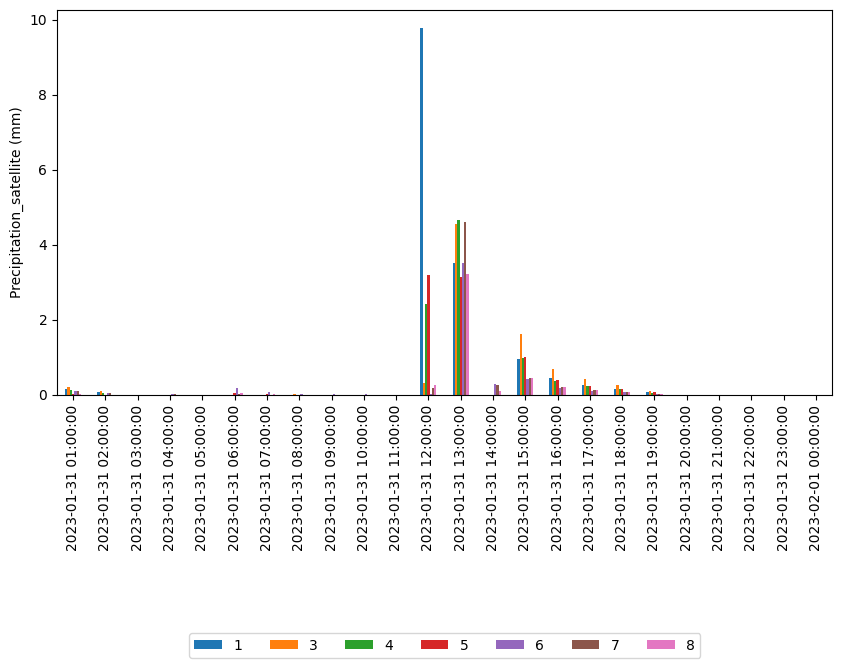

In [80]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.plot(kind='bar', ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Precipitation_satellite (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=7)
plt.show()

Plot the accumulated precipitation

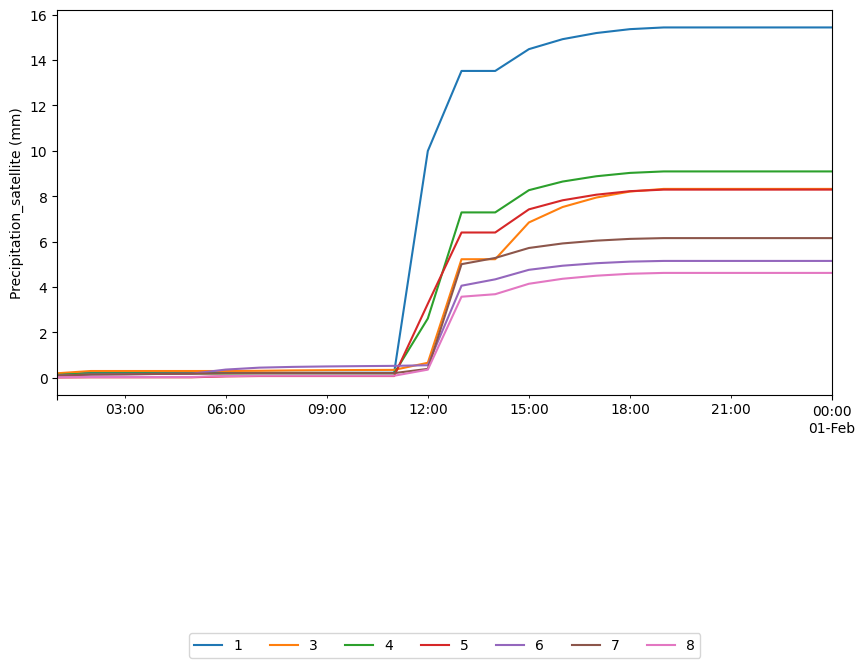

In [81]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.cumsum().plot( ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Precipitation_satellite (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=7)
plt.show()

Do the same for the coastal catchment

In [82]:
dataset_list = []  # Store data frames for concatenation later

for index, item in enumerate(list_of_Files):
    print(index + 1, 'out of', len(list_of_Files))

    try:
        with h5py.File(item, 'r') as data:
            precip = data['/Grid/precipitationCal'][:]
    except (IOError, EOFError):
        continue  # Skip to next file if there's an error

    precip[precip < 0] = np.nan  # Replace negative values with NaN
    precip = np.flip(precip[0, :, :].transpose(), axis=0)  # Flip and transpose

    # Convert to xarray DataArray
    precip = xr.DataArray(precip, dims=('lat', 'lon'), coords={'lat': theLats, 'lon': theLons})
    precip.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
    precip.rio.write_crs("epsg:4326", inplace=True)

    # Clip the data using the catchment shape
    precip = precip.rio.clip(catchment_shp_2.geometry.apply(mapping), catchment_shp_2.crs, all_touched=True)
    precip = precip.values.flatten()

    # Extract date from filename
    year = int(item[-40:-36])
    month = int(item[-36:-34])
    day = int(item[-34:-32])
    hour = int(item[-22:-20])
    minute = int(item[-20:-18])

    date = datetime.datetime(year, month, day, hour, minute, 0)

    # Convert to DataFrame
    data = pd.DataFrame(precip)
    data = data.dropna()
    data = data.T
    data.index = pd.DatetimeIndex([date])  # Set datetime index

    dataset_list.append(data)  # Append to the list

# Concatenate all DataFrames
if dataset_list:
    dataset = pd.concat(dataset_list)

# Resample dataset
dataset = dataset.resample('h', label='right', closed='right').sum()


1 out of 48
2 out of 48
3 out of 48
4 out of 48
5 out of 48
6 out of 48
7 out of 48
8 out of 48
9 out of 48
10 out of 48
11 out of 48
12 out of 48
13 out of 48
14 out of 48
15 out of 48
16 out of 48
17 out of 48
18 out of 48
19 out of 48
20 out of 48
21 out of 48
22 out of 48
23 out of 48
24 out of 48
25 out of 48
26 out of 48
27 out of 48
28 out of 48
29 out of 48
30 out of 48
31 out of 48
32 out of 48
33 out of 48
34 out of 48
35 out of 48
36 out of 48
37 out of 48
38 out of 48
39 out of 48
40 out of 48
41 out of 48
42 out of 48
43 out of 48
44 out of 48
45 out of 48
46 out of 48
47 out of 48
48 out of 48


Display the dataframe

In [83]:
dataset

,1,3,4,5,6,7,8,10,11
2023-01-31 01:00:00,6.686399,5.629199,2.3996,0.2956,0.770000,0.2796,0.0316,0.0000,0.0
2023-01-31 02:00:00,0.038400,2.518800,0.3160,0.0000,3.309999,0.4632,0.0000,0.0672,0.0
2023-01-31 03:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0
2023-01-31 04:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0
2023-01-31 05:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0
2023-01-31 06:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0
2023-01-31 07:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0
2023-01-31 08:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0
2023-01-31 09:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0
2023-01-31 10:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0


Export the dataframe to csv

In [84]:
dataset.to_csv(folder_files+"IMERG-ER_UTC_Catchment_2.csv", index=True)

Plot the precipitation time series.

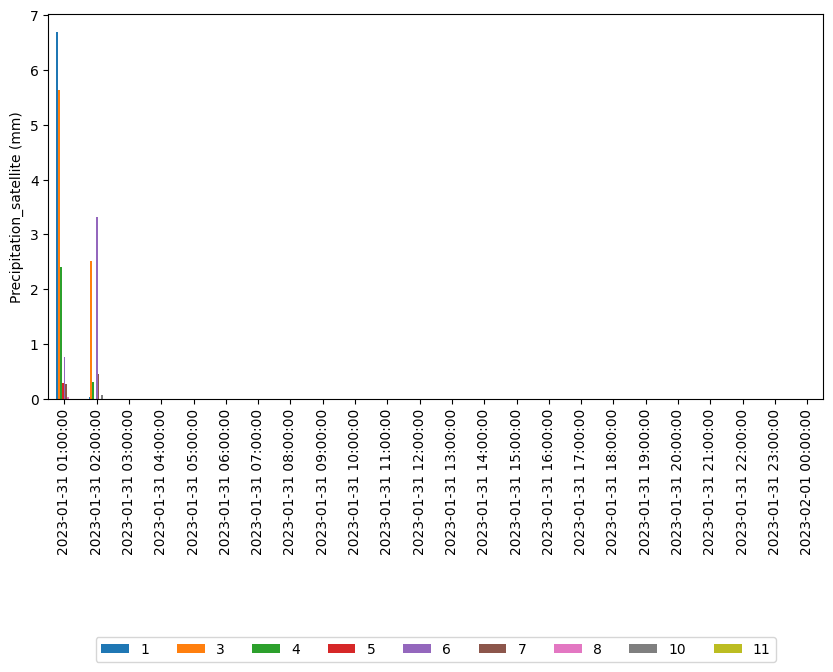

In [85]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.plot(kind='bar', ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Precipitation_satellite (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=9)
plt.show()

Plot the accumulated precipitation

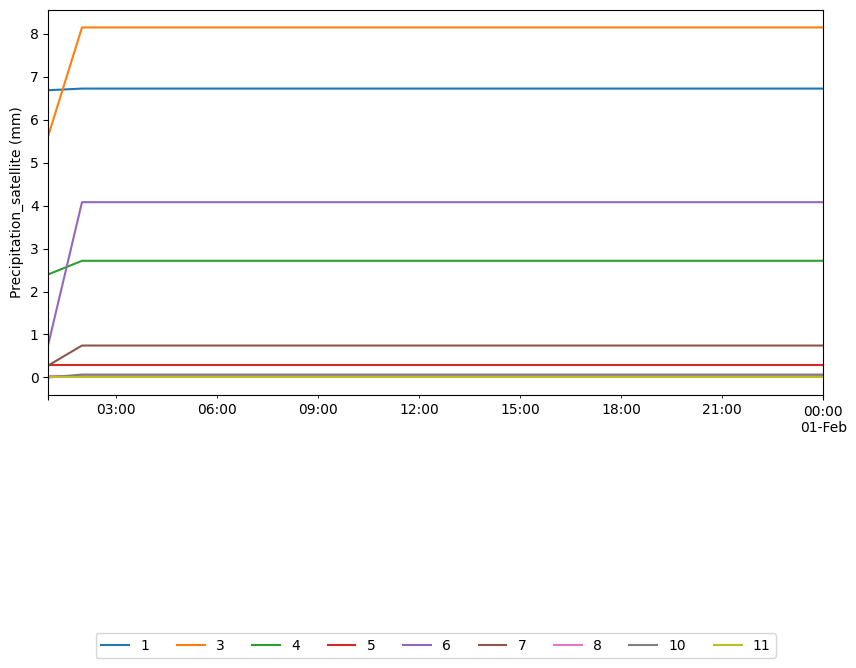

In [86]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.cumsum().plot( ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Precipitation_satellite (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=9)
plt.show()